In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import tqdm
import os
import umap
import matplotlib.pyplot as plt
import glob
from top2vec import Top2Vec

In [2]:
data="./aylien_covid_news_cleaned_india"


In [3]:
full_df=pd.DataFrame()

In [4]:
for json_file in os.listdir(data):
    df=pd.read_json(os.path.join(data,json_file))
    full_df=pd.concat([full_df,df])

In [5]:
full_df.index=full_df.publish_time
full_df.head(1)

summary  \
publish_time                                                             
2020-03-12 13:58:41  Commonwealth Games gold medalist Parupalli Kas...   

                                                               heading  \
publish_time                                                             
2020-03-12 13:58:41  Tokyo Olympics qualification at risk, want cla...   

                     words_count  \
publish_time                       
2020-03-12 13:58:41          431   

                                                              hashtags  \
publish_time                                                             
2020-03-12 13:58:41  [#ParupalliKashyap, #India, #Birmingham, #Spai...   

                                                              keywords  \
publish_time                                                             
2020-03-12 13:58:41  [quarantine, clarity, advisory, risk, Parupall...   

                           publish_time body_polarity  body_polarity_score  \
publish_time                                                                 
2020-03-12 13:58:41 2020-03-12 13:58:41      negative             0.675187   

                    title_polarity  title_polarity_score country_origin  \
publish_time                                                              
2020-03-12 13:58:41        neutral              0.796812             IN   

                    state_origin city_origin  
publish_time                                  
2020-03-12 13:58:41         None        None

In [43]:
model.get_num_topics()

1030

In [45]:
model.save("news_top2vec")

In [47]:
model.get_topic_sizes()

(array([1402, 1369, 1336, ...,   22,   22,   20], dtype=int64),
 array([   0,    1,    2, ..., 1027, 1028, 1029], dtype=int64))

In [48]:
model.get_topics(10)

(array([['sensex', 'nifty', 'indices', 'index', 'benchmark', 'bse', 'nse',
         'stocks', 'laggards', 'broader', 'points', 'trading', 'gainers',
         'msci', 'fell', 'gains', 'gainer', 'selloff', 'midcap',
         'rallied', 'indusind', 'indexes', 'benchmarks', 'equities',
         'smallcap', 'barometer', 'tumbled', 'vix', 'sentiment',
         'markets', 'lows', 'plunged', 'broadest', 'gained', 'sgx',
         'losers', 'cent', 'cues', 'nikkei', 'investors', 'stock',
         'rebounded', 'surged', 'futures', 'bourses', 'lower', 'equity',
         'hdfc', 'ended', 'shares'],
        ['cases', 'number', 'total', 'deaths', 'tally', 'reported',
         'fatalities', 'toll', 'confirmed', 'risen', 'cured', 'climbed',
         'recorded', 'discharged', 'far', 'count', 'migrated', 'death',
         'highest', 'detected', 'active', 'crossed', 'rose', 'infections',
         'recovered', 'bulletin', 'positive', 'fresh', 'health',
         'figures', 'died', 'recoveries', 'taking', 'm

In [50]:
import time

Enter the word to search similar topics without spaces: mandir


Time: 8.29466199874878


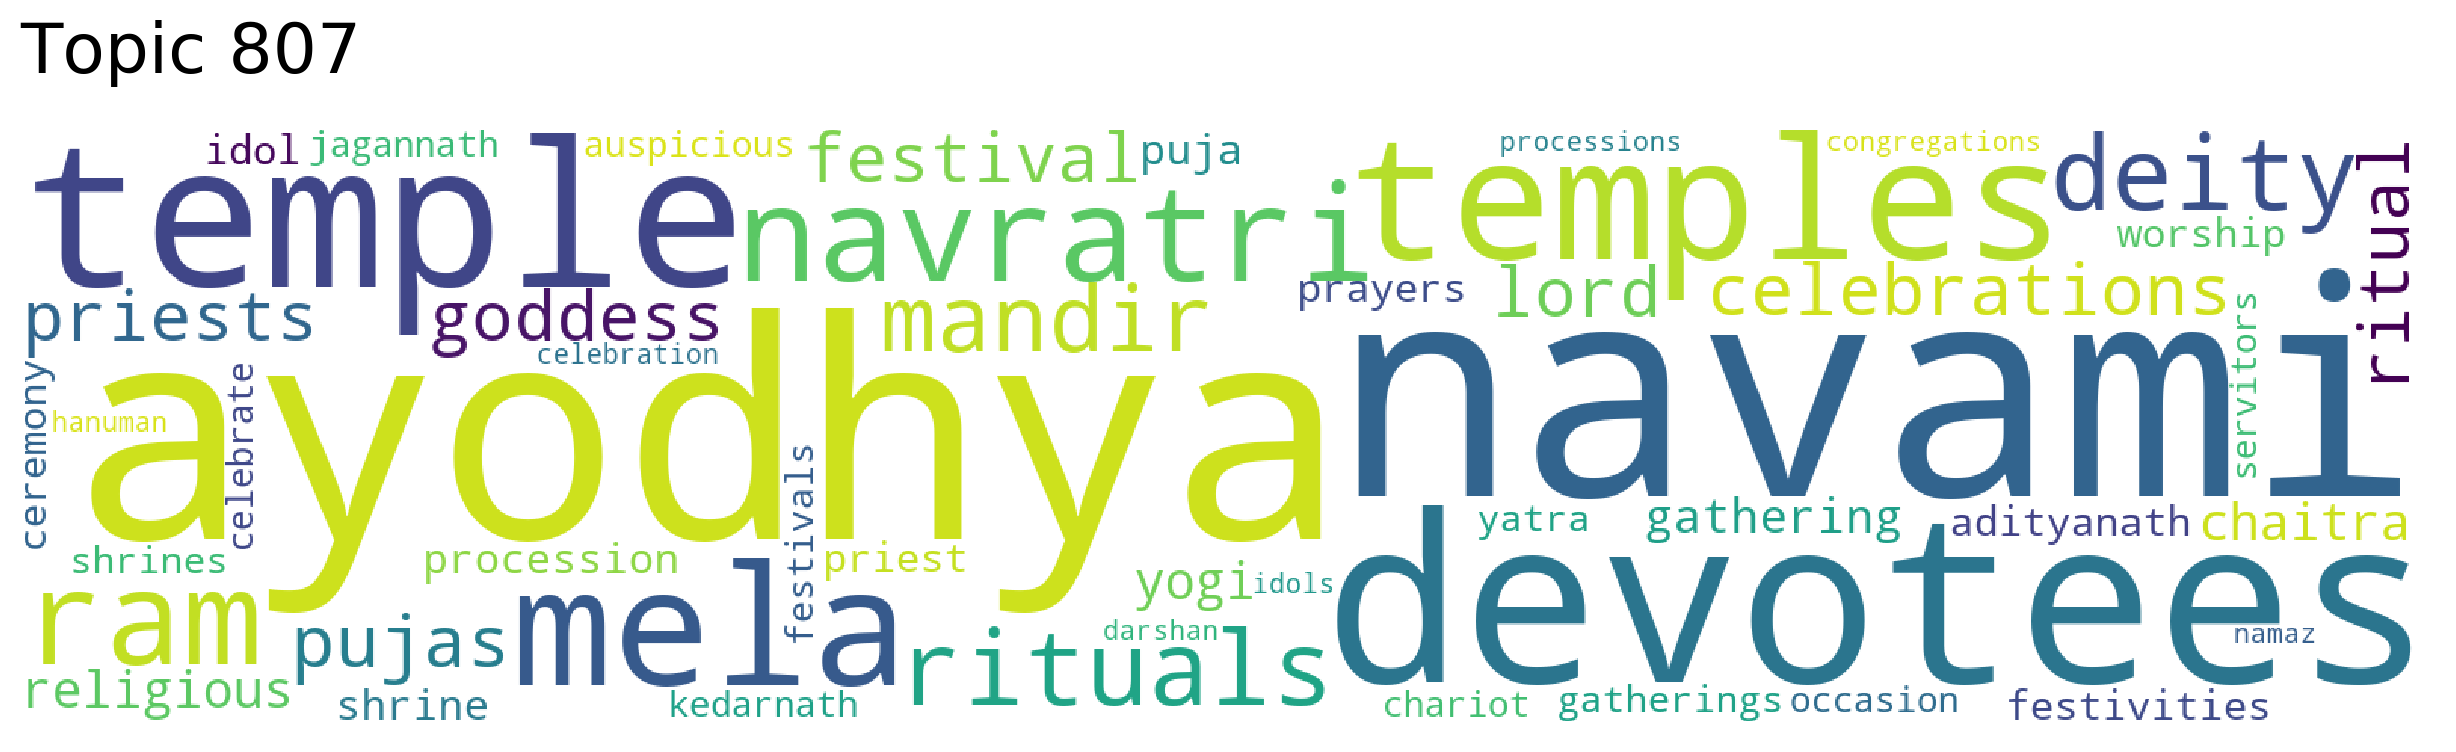

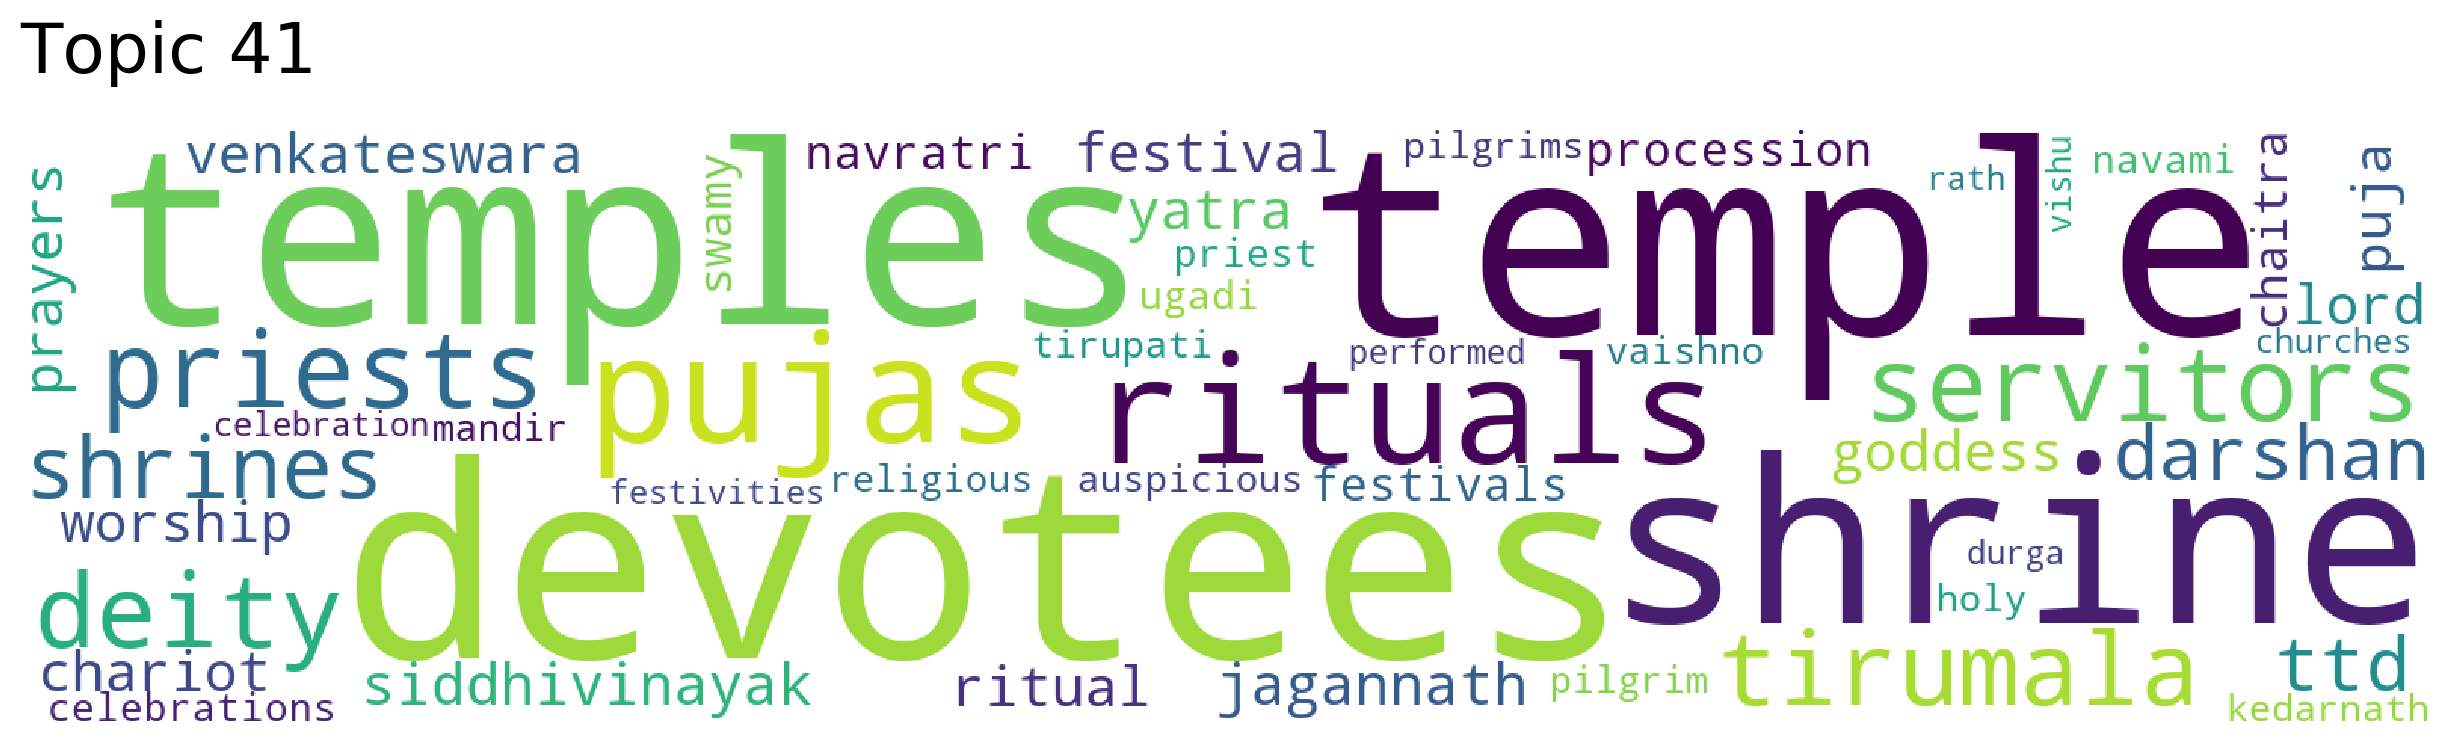

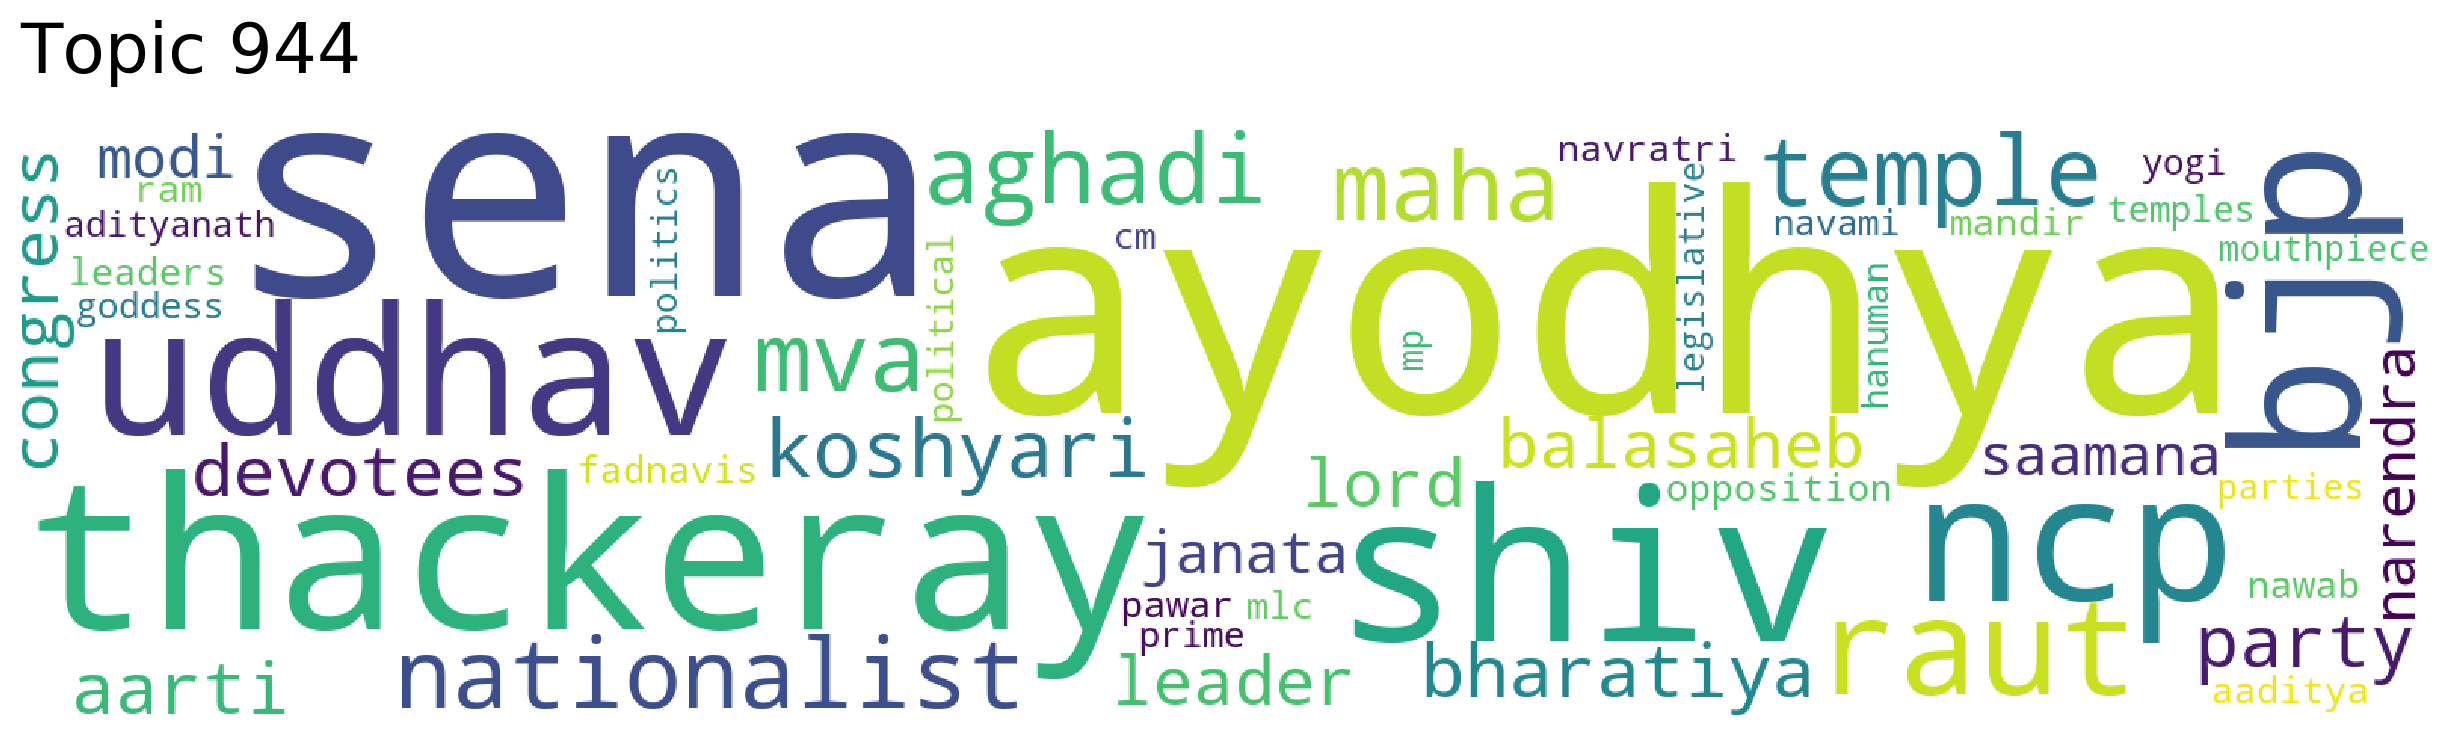

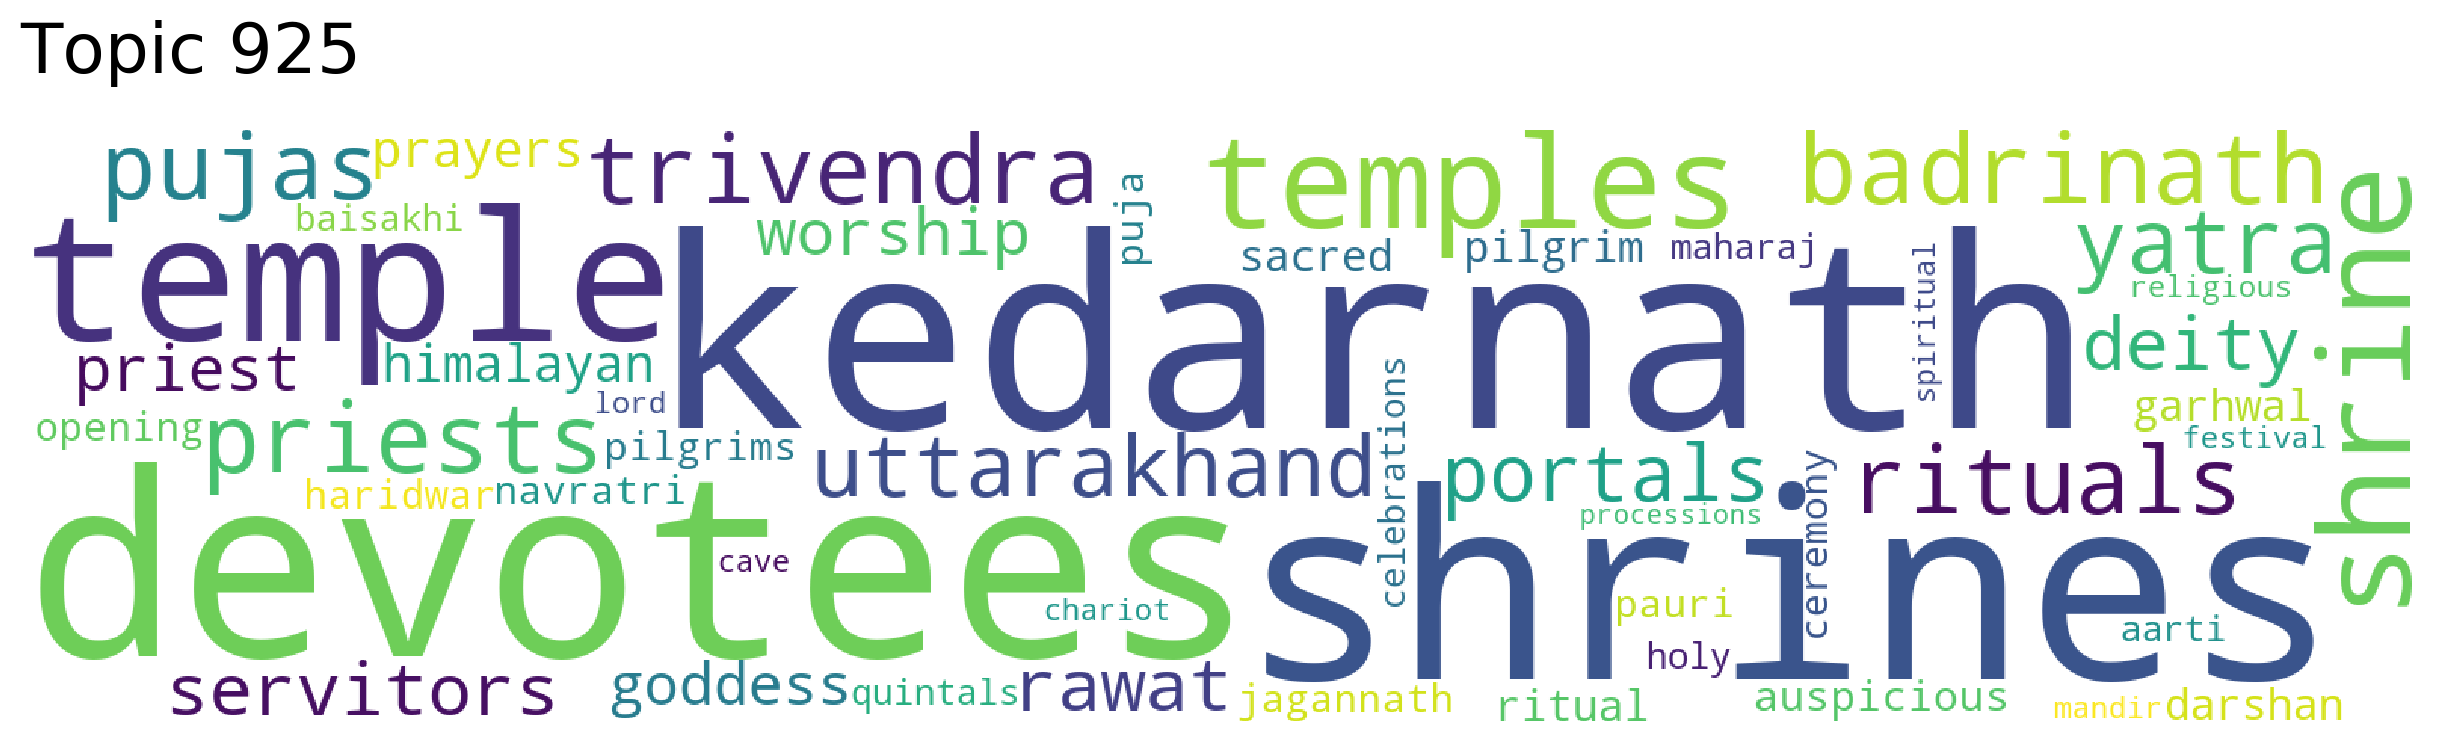

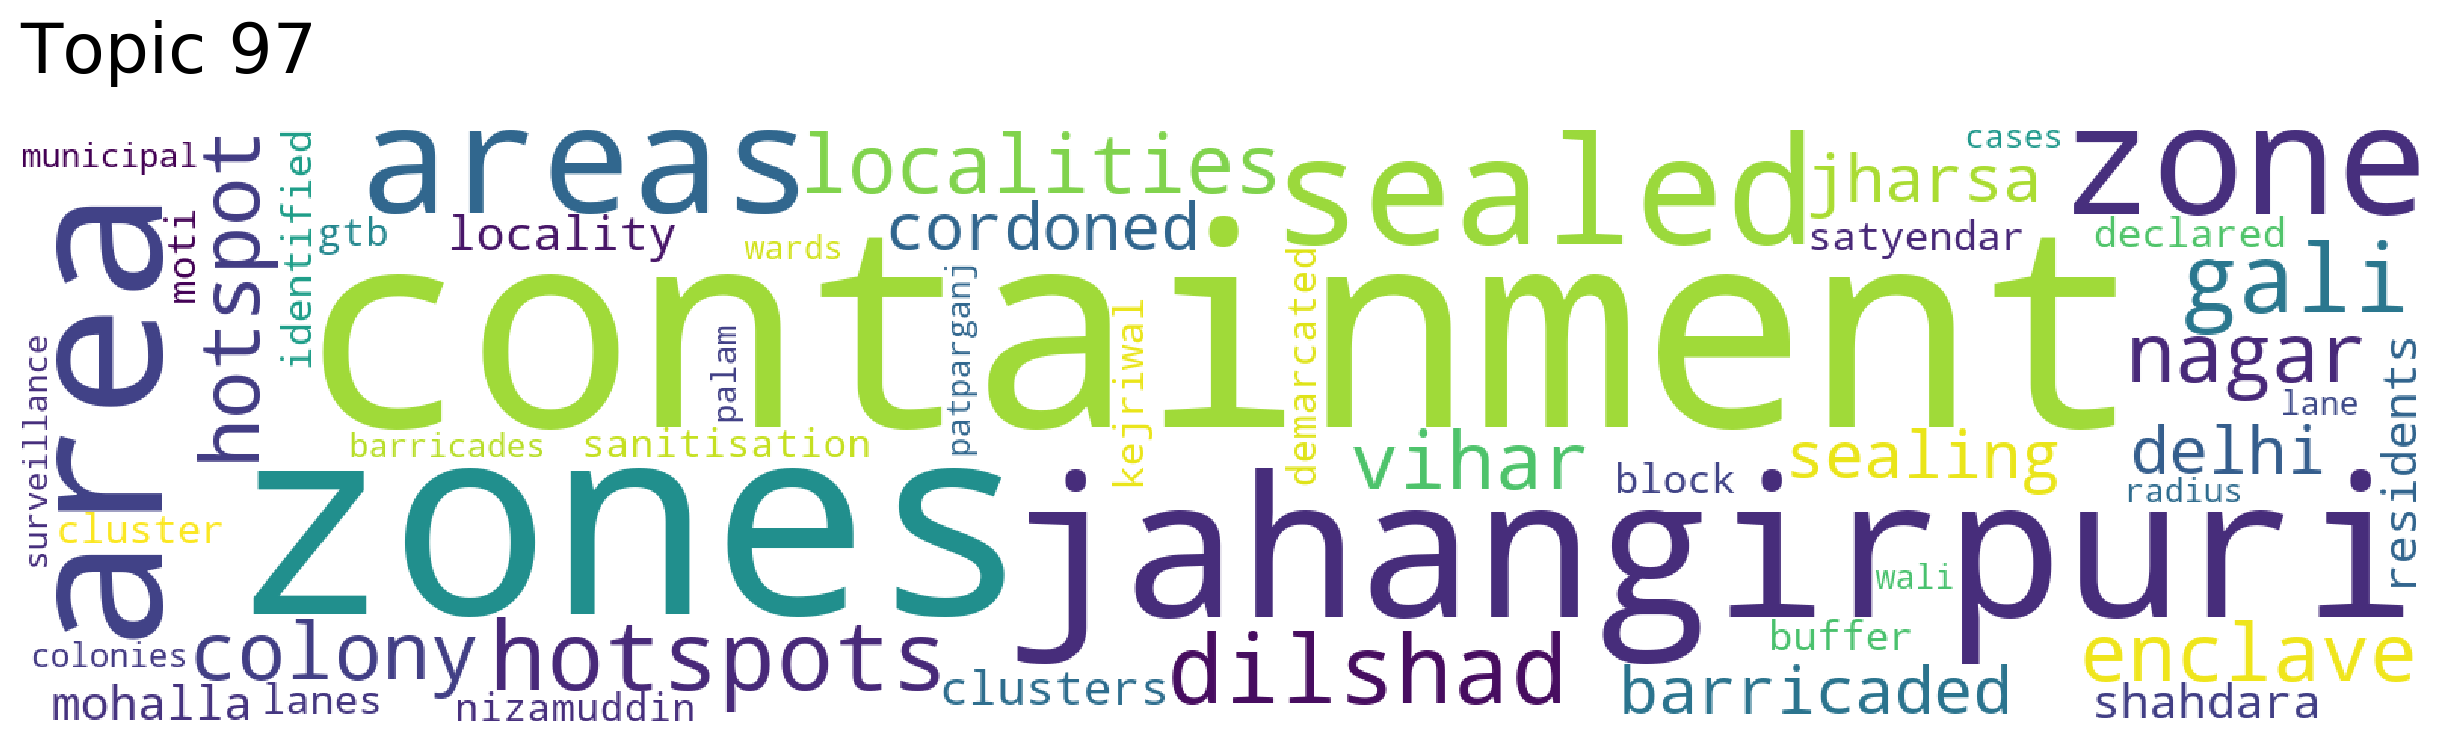

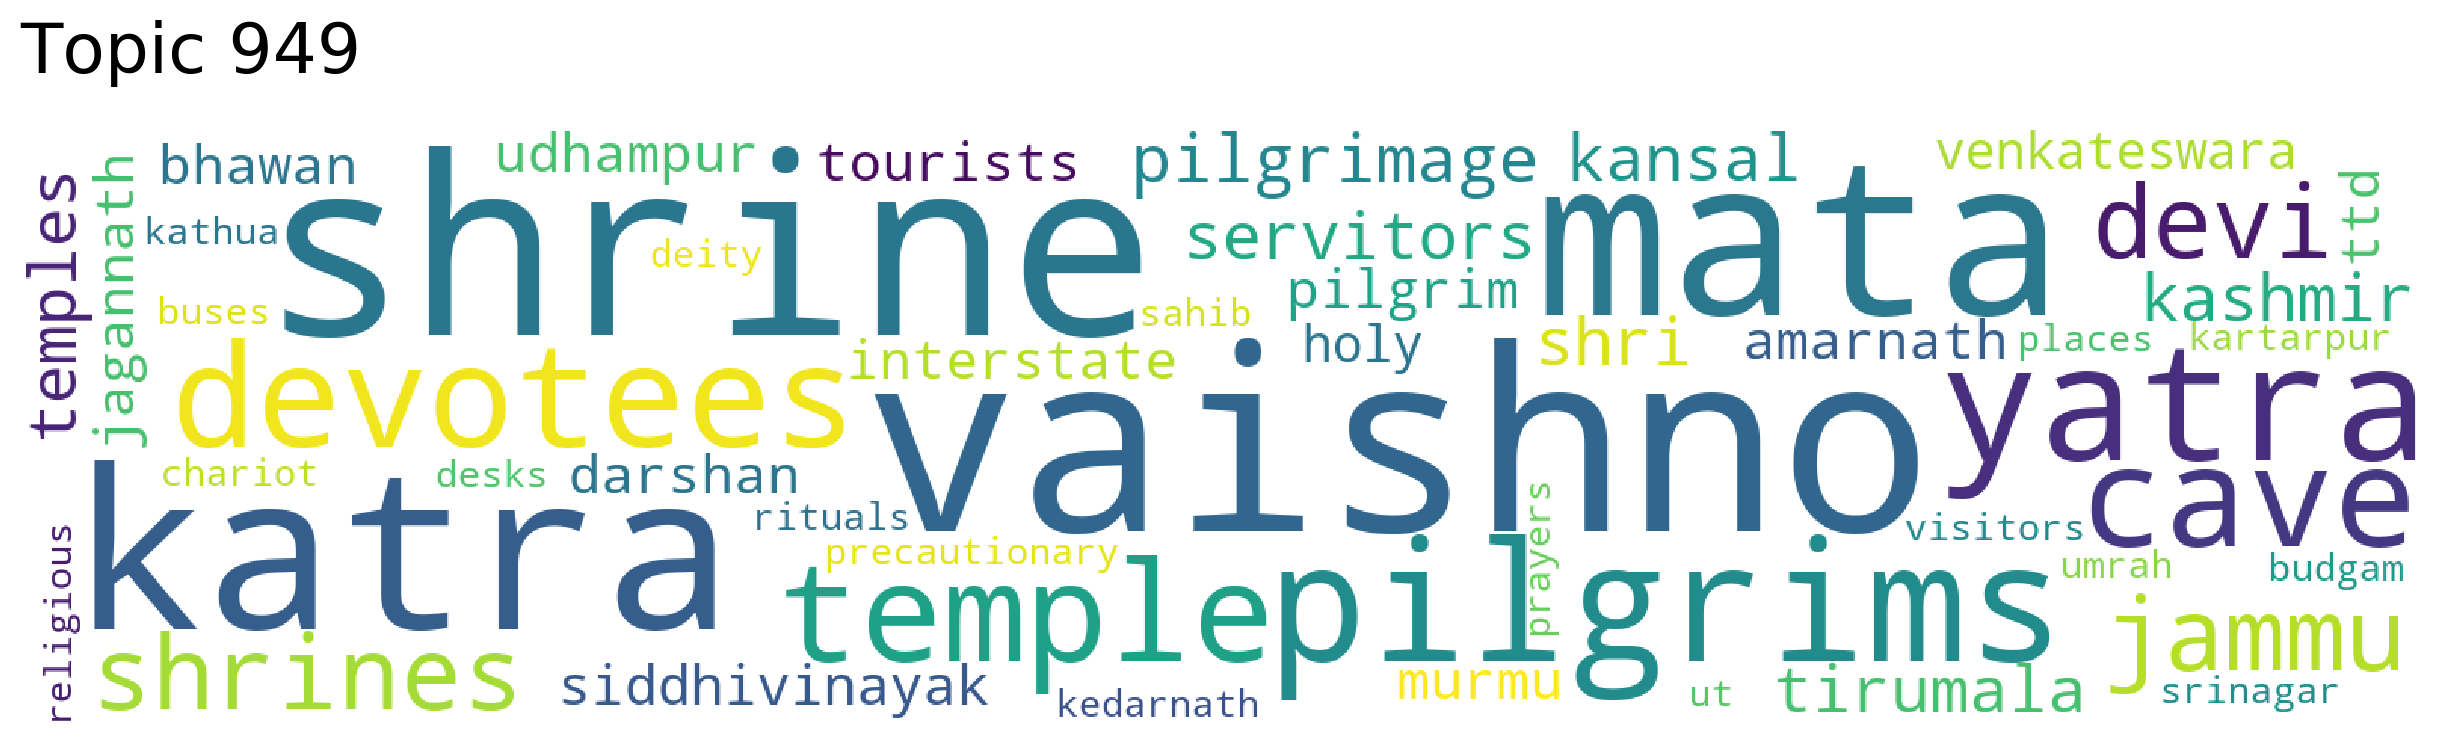

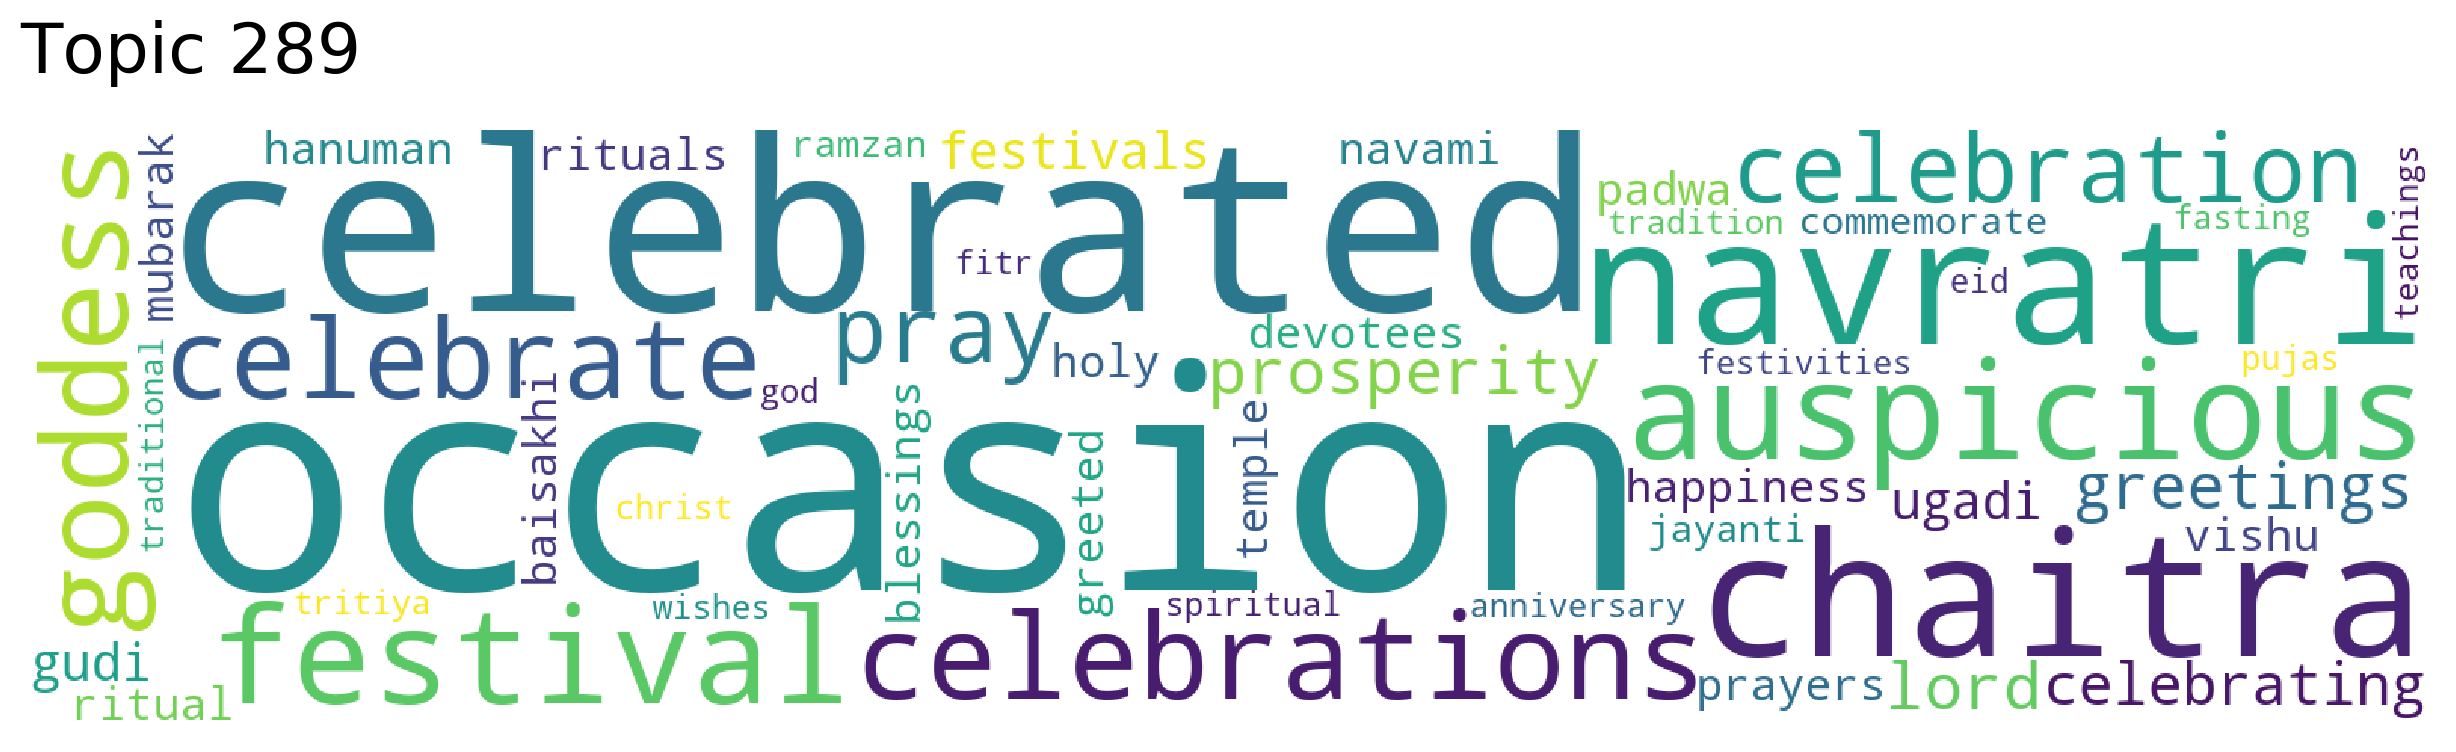

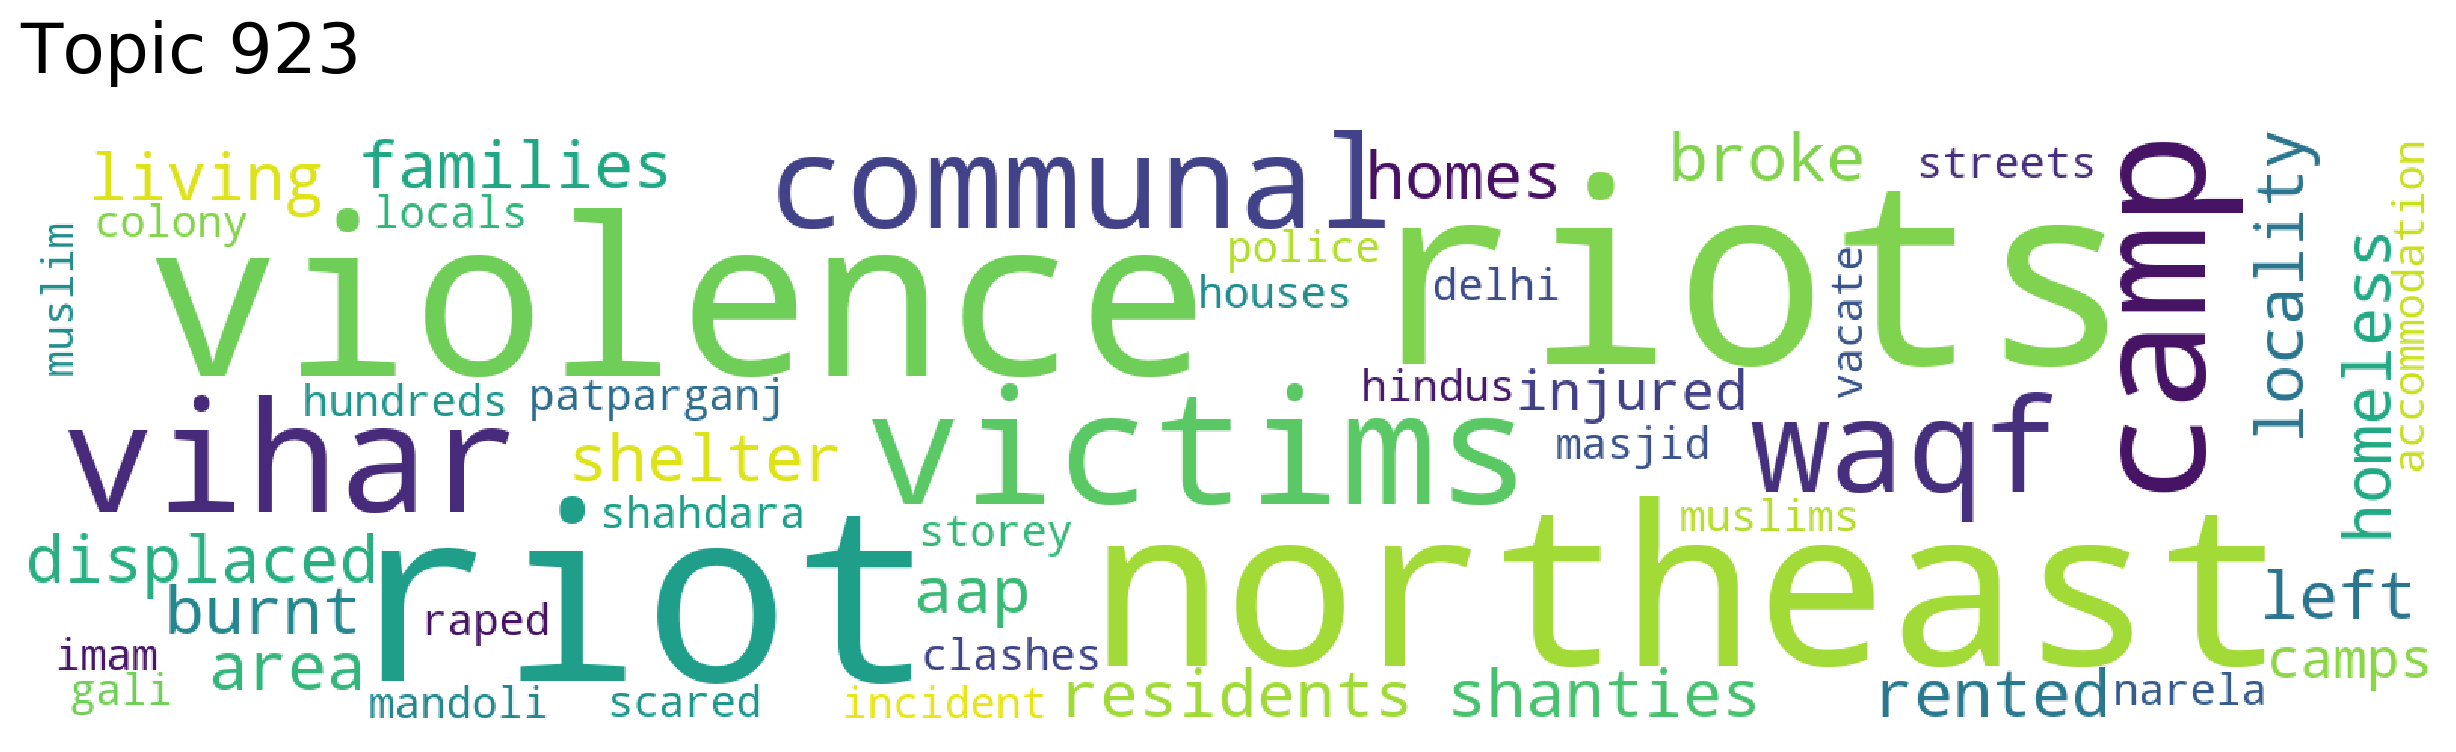

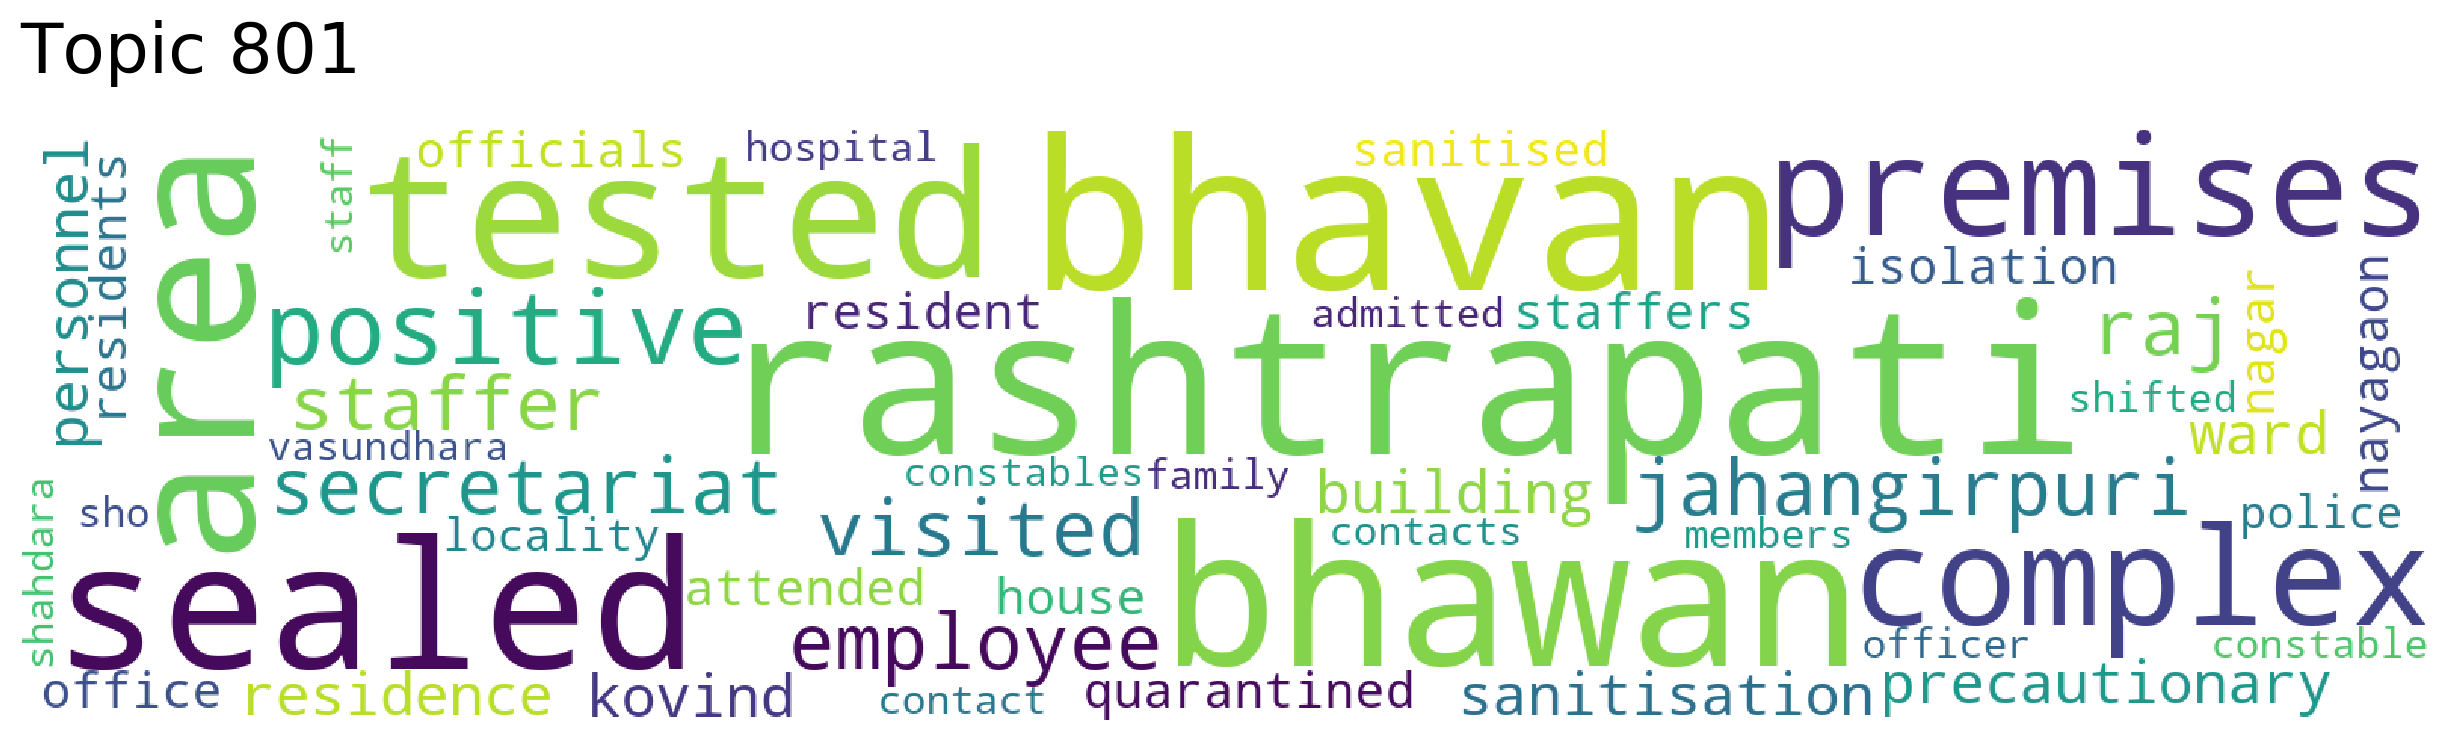

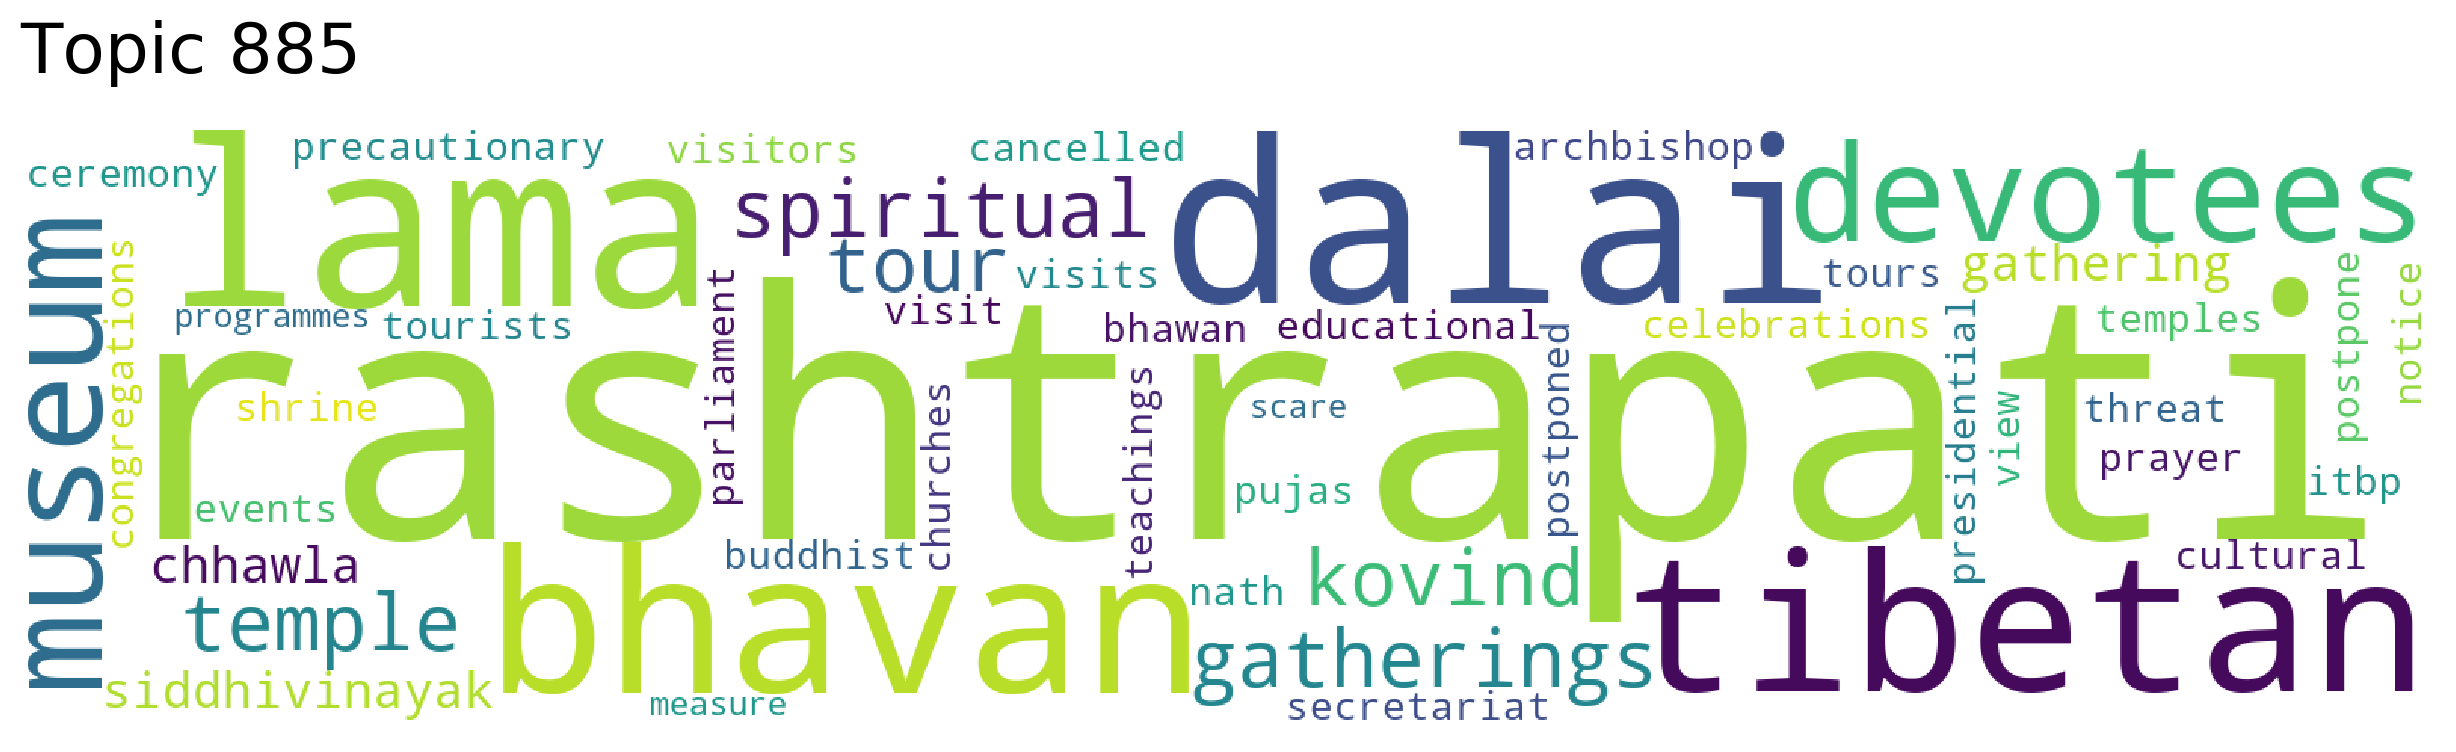

In [53]:
start=time.time()
key=str(input("Enter the word to search similar topics without spaces:"))
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=[key], num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic,background_color="white")
print("Time:",time.time()-start)

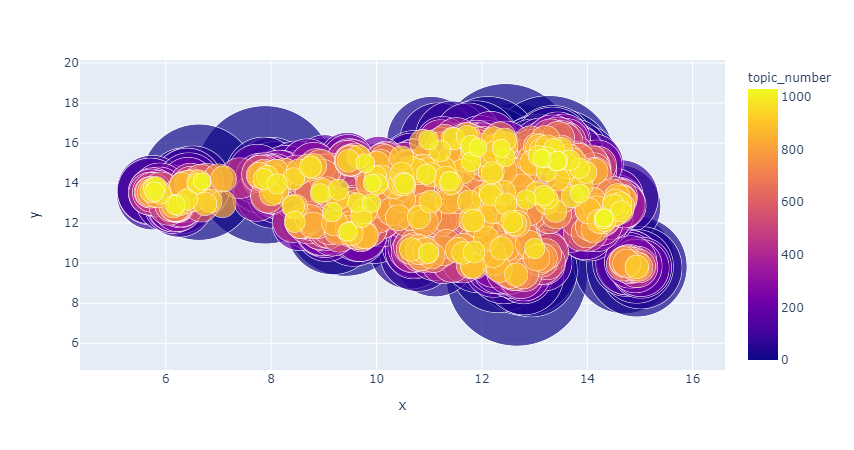

In [58]:

standard_embedding = umap.UMAP(n_neighbors=15).fit_transform(model.topic_vectors)
topic_words=[str(" ".join(i[:15])) for i in model.get_topics()[0]]
df =pd.DataFrame(data=np.array([standard_embedding[:, 0], standard_embedding[:, 1],model.get_topic_sizes()[0],model.get_topic_sizes()[1]]).transpose()) 
df.columns=["x","y","number_of_tweets_in_topic","topic_number"]
fig = px.scatter(df, x="x", y="y",size_max=100,size="number_of_tweets_in_topic",color="topic_number",hover_name=topic_words)
fig.show()


In [59]:
fig.write_html("news.html")

In [62]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["jamat"], num_docs=50)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print() 

Document: 142799, Score: 0.5527
-----------
Seventy four people, most of whom attended the Tablighi Jamat meet in Delhi, tested positive for coronavirus in Tamil Nadu on Saturday, taking the total number of cases to 485, health secretary Beela Rajesh said. “Of the total number, 73 people took part in the Tablighi Jamat congregation at Nizamuddin West in Delhi,” she told reporters.
-----------

Document: 142724, Score: 0.5383
-----------
 Seventy four people, most of whom 



attended the Tablighi Jamat meet in Delhi, tested positive for coronavirus in Tamil Nadu on Saturday, taking the total number of cases to 485, health secretary Beela Rajesh said. "Of the total number, 73 people took part in the Tablighi Jamat congregation at Nizamuddin West in Delhi," she told reporters.
-----------

Document: 142430, Score: 0.538
-----------
Seventy four people, most of whom attended the Tablighi Jamat meet in Delhi, tested positive for coronavirus in Tamil Nadu on April 4, taking the total number

In [67]:
key=str(input("Enter the word to find the similar words"))
words, word_scores = model.similar_words(keywords=[key], keywords_neg=[], num_words=50)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

Enter the word to find the similar words cbse


exams 0.7816
exam 0.7236
hrd 0.7092
examinations 0.6998
class 0.6473
subjects 0.6408
datesheet 0.6379
pokhriyal 0.6208
nishank 0.6047
jee 0.5899
icse 0.5864
xii 0.586
examination 0.5846
classes 0.5833
students 0.577
ncert 0.5744
syllabus 0.5717
academic 0.5704
education 0.5663
neet 0.5662
cisce 0.5468
secondary 0.5418
nios 0.5343
mains 0.5318
evaluation 0.5238
nta 0.523
ssc 0.5152
mhrd 0.514
teachers 0.5133
isc 0.5108
school 0.4998
schools 0.49
undergraduate 0.4877
ugc 0.4821
educational 0.4744
madhyamik 0.4721
sslc 0.4692
universities 0.4657
entrance 0.4455
mathematics 0.4453
papers 0.4414
semester 0.4406
candidates 0.4383
ug 0.4355
principals 0.4336
upsc 0.4312
promoted 0.4275
teaching 0.4222
board 0.4147
courses 0.4142
